In [28]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
prices = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv')
prices

,Unnamed: 0,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
0,192607,-99.99,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
1,192608,-99.99,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
2,192609,-99.99,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
3,192610,-99.99,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
4,192611,-99.99,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,201808,-99.99,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
1106,201809,-99.99,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
1107,201810,-99.99,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
1108,201811,-99.99,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


In [4]:
columns = ['Lo 10', 'Hi 10']
samples = prices[columns]
samples

,Lo 10,Hi 10
0,-1.45,3.29
1,5.12,3.70
2,0.93,0.67
3,-4.84,-2.43
4,-0.78,2.70
...,...,...
1105,2.41,2.34
1106,-1.68,0.87
1107,-10.02,-6.57
1108,-3.65,2.53


In [19]:
percentage = samples/100
percentage

,Lo 10,Hi 10
0,-0.0145,0.0329
1,0.0512,0.0370
2,0.0093,0.0067
3,-0.0484,-0.0243
4,-0.0078,0.0270
...,...,...
1105,0.0241,0.0234
1106,-0.0168,0.0087
1107,-0.1002,-0.0657
1108,-0.0365,0.0253


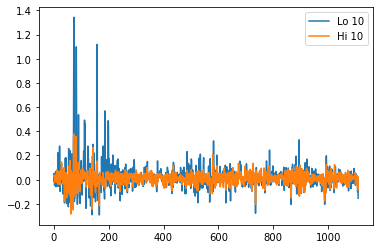

In [45]:
percentage.plot.line()

In [29]:
monthly_vol = percentage.std()
annualized_vol = monthly_vol * np.sqrt(12)
annualized_vol

Lo 10    0.368193
Hi 10    0.186716
dtype: float64

In [35]:
monthly_returns = (percentage + 1).prod()**(1/samples.shape[0]) - 1
monthly_returns

Lo 10    0.012986
Hi 10    0.007423
dtype: float64

In [42]:
annualized_returns = (monthly_returns + 1)**12 - 1
annualized_returns

Lo 10    0.167463
Hi 10    0.092810
dtype: float64

In [44]:
risk_free = 0.03
sharpe_ratio = (annualized_returns - risk_free) / annualized_vol
sharpe_ratio

Lo 10    0.373346
Hi 10    0.336392
dtype: float64